In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

df = pd.read_csv('./datasets/heart.csv')

In [21]:
#wyświetl dane
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
from sklearn import preprocessing as p
from sklearn.model_selection import train_test_split

#standaryzuj dane (bez ostatniej kolumny!)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df_scaled = p.StandardScaler().fit_transform(X)

#podziel dane na zbiór treningowy i walidacyjny
X_train, X_val, y_train, y_val = train_test_split(df_scaled, y, test_size=0.2, random_state=42)


In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
#pierwsza siec neuronowa
model = Sequential([
        Input(shape = (13)),
        Dense(8, activation = 'relu'),
        Dense(1)
])

In [24]:
#podsumowanie budowy i wielkości modelu
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 112       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [25]:
#kompilowanie modelu
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
#proces uczenia
EPOCHS = 100

history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100


8/8 [==============================] - 1s 49ms/step - loss: 8.8172 - accuracy: 0.3306 - val_loss: 8.4009 - val_accuracy: 0.3279
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 8.6805 - accuracy: 0.3388 - val_loss: 8.5496 - val_accuracy: 0.3443
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 8.5553 - accuracy: 0.3430 - val_loss: 8.5330 - val_accuracy: 0.3443
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 8.4871 - accuracy: 0.3471 - val_loss: 8.3662 - val_accuracy: 0.3443
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 8.4747 - accuracy: 0.3471 - val_loss: 8.3132 - val_accuracy: 0.3443
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 8.4642 - accuracy: 0.3471 - val_loss: 8.2966 - val_accuracy: 0.3443
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 8.4562 - accuracy: 0.3512 - val_loss: 8.1119 - val_accuracy: 0.3607
Epoch 8/100
8/8 [================

In [27]:
#zamiana wyników zapisanych w history na dataframe
hist = pd.DataFrame(history.history)

In [28]:
#wyświetl hist
hist

,loss,accuracy,val_loss,val_accuracy
0,8.817190,0.330579,8.400867,0.327869
1,8.680512,0.338843,8.549620,0.344262
2,8.555314,0.342975,8.533013,0.344262
3,8.487061,0.347107,8.366234,0.344262
4,8.474738,0.347107,8.313179,0.344262
...,...,...,...,...
95,4.377728,0.570248,4.279677,0.606557
96,4.376507,0.578512,4.276577,0.606557
97,4.375179,0.578512,4.274766,0.606557
98,4.373895,0.578512,4.272981,0.606557


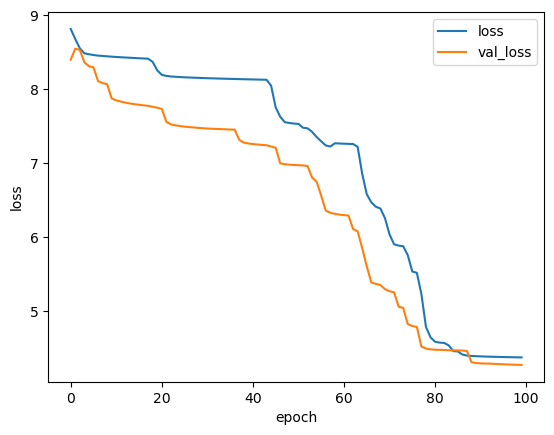

In [29]:
#proces uczenia na wykresie
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

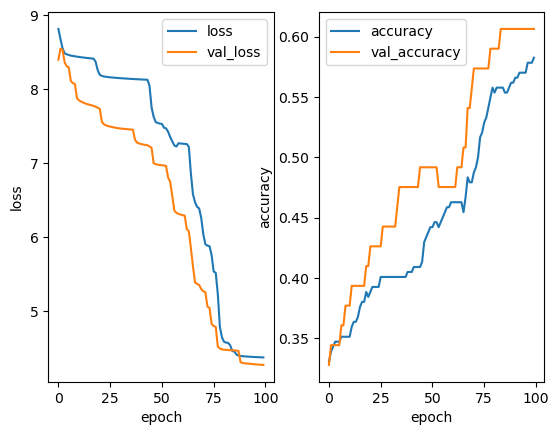

<Figure size 640x480 with 0 Axes>

In [30]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

In [31]:
#stwórz model o dwóch warstwach ukrytych (64 i 8). Nadaj modelowi i historii uczenia unikalną nazwę
model2 = Sequential([
        Input(shape = (13)),
        Dense(64, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(1)
])
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
EPOCHS = 100
history2 = model2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))
hist2 = pd.DataFrame(history2.history)

Epoch 1/100
8/8 [==============================] - 1s 47ms/step - loss: 6.1188 - accuracy: 0.4215 - val_loss: 6.1555 - val_accuracy: 0.4754
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 5.2002 - accuracy: 0.4174 - val_loss: 4.2564 - val_accuracy: 0.4918
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 4.6066 - accuracy: 0.4256 - val_loss: 3.3012 - val_accuracy: 0.5082
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 3.4917 - accuracy: 0.4504 - val_loss: 2.3285 - val_accuracy: 0.5410
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 2.6936 - accuracy: 0.5041 - val_loss: 1.8155 - val_accuracy: 0.5902
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 2.1256 - accuracy: 0.5620 - val_loss: 1.7206 - val_accuracy: 0.6230
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 1.8424 - accuracy: 0.6116 - val_loss: 1.1296 - val_accuracy: 0.6393
Epoch 8/100
8/8 [===

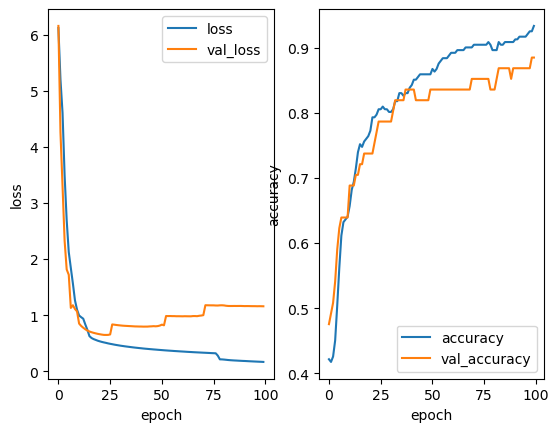

<Figure size 640x480 with 0 Axes>

In [32]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(hist2.loss, label = "loss")
plt.plot(hist2.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist2.accuracy, label = "accuracy")
plt.plot(hist2.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

In [33]:
#stwórz model o dwóch warstwach ukrytych (8 i 4). Nadaj modelowi i historii uczenia unikalną nazwę
model3 = Sequential([
        Input(shape = (13)),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1)
])
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
EPOCHS = 100
history3 = model3.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))
hist3 = pd.DataFrame(history3.history)

Epoch 1/100
8/8 [==============================] - 1s 64ms/step - loss: 7.2045 - accuracy: 0.4050 - val_loss: 5.6408 - val_accuracy: 0.4918
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 7.0156 - accuracy: 0.4050 - val_loss: 5.5846 - val_accuracy: 0.4918
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 6.9173 - accuracy: 0.4050 - val_loss: 5.3887 - val_accuracy: 0.4918
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 6.8212 - accuracy: 0.4050 - val_loss: 5.3640 - val_accuracy: 0.4918
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 6.7351 - accuracy: 0.4050 - val_loss: 5.1730 - val_accuracy: 0.4918
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 6.6490 - accuracy: 0.4091 - val_loss: 5.1426 - val_accuracy: 0.4918
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 6.4354 - accuracy: 0.4091 - val_loss: 4.9206 - val_accuracy: 0.4918
Epoch 8/100
8/8 [===

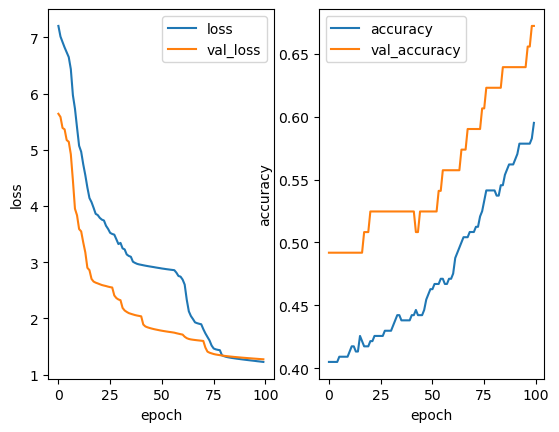

<Figure size 640x480 with 0 Axes>

In [34]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(hist3.loss, label = "loss")
plt.plot(hist3.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist3.accuracy, label = "accuracy")
plt.plot(hist3.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

In [35]:
#stwórz model o dwóch warstwach ukrytych (4 i 2). Nadaj modelowi i historii uczenia unikalną nazwę
model4 = Sequential([
        Input(shape = (13)),
        Dense(4, activation = 'relu'),
        Dense(2, activation = 'relu'),
        Dense(1)
])
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
EPOCHS = 100
history4 = model4.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))
hist4 = pd.DataFrame(history4.history)

Epoch 1/100
8/8 [==============================] - 1s 54ms/step - loss: 8.3799 - accuracy: 0.3802 - val_loss: 7.8168 - val_accuracy: 0.3607
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 8.3171 - accuracy: 0.3802 - val_loss: 7.7853 - val_accuracy: 0.3770
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 8.3010 - accuracy: 0.3802 - val_loss: 7.7655 - val_accuracy: 0.3770
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 8.2924 - accuracy: 0.3802 - val_loss: 7.5749 - val_accuracy: 0.3770
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 8.2863 - accuracy: 0.3802 - val_loss: 7.5427 - val_accuracy: 0.3770
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 8.2801 - accuracy: 0.3843 - val_loss: 7.5272 - val_accuracy: 0.3770
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 8.1963 - accuracy: 0.3884 - val_loss: 7.4997 - val_accuracy: 0.4098
Epoch 8/100
8/8 [===

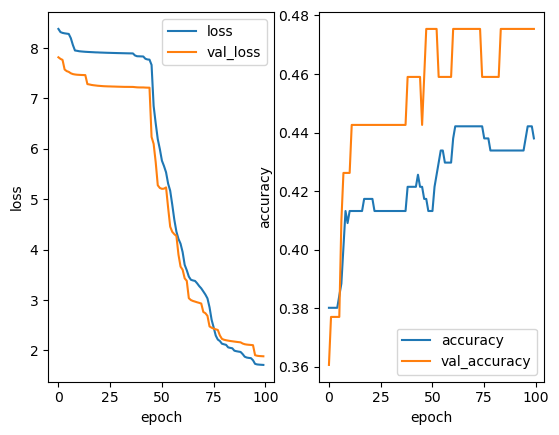

<Figure size 640x480 with 0 Axes>

In [36]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1,2,1)
plt.plot(hist4.loss, label = "loss")
plt.plot(hist4.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist4.accuracy, label = "accuracy")
plt.plot(hist4.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

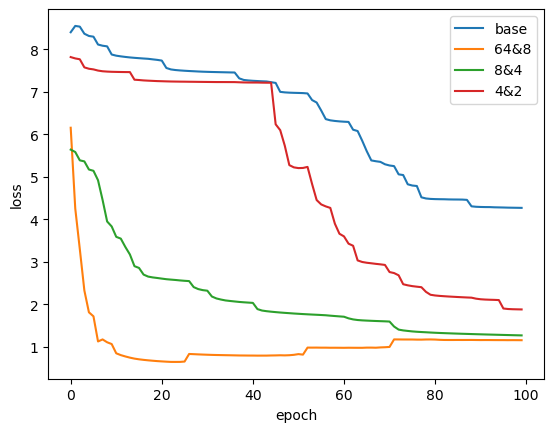

In [37]:
#zamiast hist_small, hist, hist_big, hist_tiny wstaw swoje nazwy historii uczenia

plt.plot(hist.val_loss, label = "base")
plt.plot(hist2.val_loss, label = "64&8")
plt.plot(hist3.val_loss, label = "8&4")
plt.plot(hist4.val_loss, label = "4&2")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

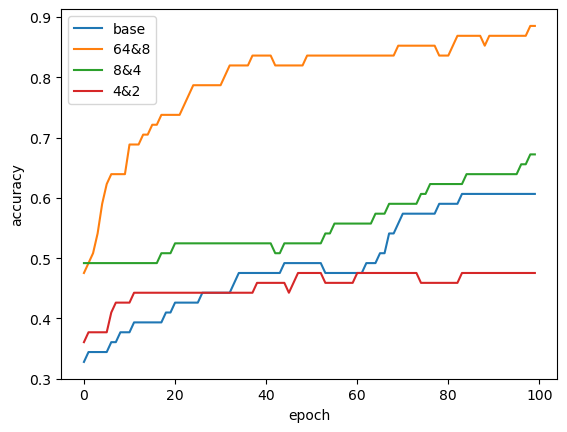

In [38]:
#zamiast hist_small, hist, hist_big, hist_tiny wstaw swoje nazwy historii uczenia
plt.plot(hist.val_accuracy, label = "base")
plt.plot(hist2.val_accuracy, label = "64&8")
plt.plot(hist3.val_accuracy, label = "8&4")
plt.plot(hist4.val_accuracy, label = "4&2")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()